# Linear regression

## Data set from Kaggle: 

https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

 19/05/2022

### 1. Import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import data set

In [5]:
path = './datasets/Salary_Data.csv'
data = pd.read_csv(path)

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

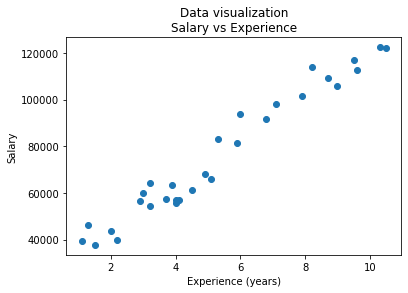

In [10]:
plt.scatter(x= data['YearsExperience'], y = data['Salary'])
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.title('Data visualization\nSalary vs Experience')
plt.show()

## Finding the best equation fit using Gradient Descent

In [11]:
X = data['YearsExperience']
y = data['Salary']

max_iter = 1000
eps = 500
alpha = 0.01

th0 = 0
th1 = 0
th = np.array([th0, th1])

m = len(X)

costs = []

for i in range(max_iter):
    
    partial0 = 2/m * np.sum(th[0] + th[1] * X -y)
    partial1 = 2/m * np.sum((th[0] + th[1] * X -y) * X)
    partgrad = np.array([partial0, partial1])

    J = np.sum(((th[0] + th[1] * X)-y)**2)/m
    
    costs.append(J)

    th0_ = th[0] - alpha * partgrad[0]
    th1_ = th[1] - alpha * partgrad[1]
    th_ = np.array([th0_, th1_])

    J_ = np.sum(((th_[0] + th_[1] * X)-y)**2)/m

    deltaJ = np.abs(J_- J)
    
    J = J_
    th = th_
    
    if deltaJ < eps:
        break
print("Convergence FOUND!")
print(f"Theta0 = {th[0]}\nTheta1 = {th[1]}")

Convergence FOUND!
Theta0 = 25273.191058621178
Theta1 = 9526.981104965911


In [12]:
len(costs)

903

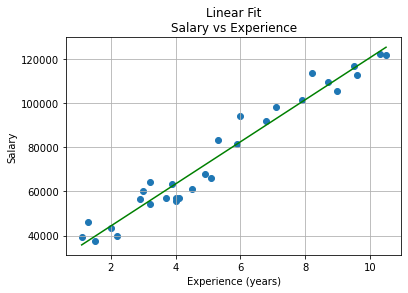

In [13]:
plt.plot(X,th[1]*X+th[0],'g-')
plt.scatter(X, y)
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.title('Linear Fit\nSalary vs Experience')
plt.grid(True)

# Creating a function of gradient descent

In [18]:
def gradient_descent(X, y, theta0 = 0, theta1 = 0, eps = 0.01, max_iter = 10000, alpha = 0.01):
    '''
    This function implements gradient descent to perform a linear fit.
    Returns a dictionary of all thetas, costs and total iters.
    '''
    def cost_function(X,y):
        return lambda theta0, theta1: np.sum(((theta0 + theta1 * X)-y)**2)/len(X)

    def deriv_th0(X, y):
        return lambda theta0, theta1: 2/len(X) * np.sum(theta0 + theta1 * X -y)

    def deriv_th1(X, y):
        return lambda theta0, theta1: 2/len(X) * np.sum((theta0 + theta1 * X -y) * X)
    
    J = cost_function(X,y)
    Dtheta0 = deriv_th0(X,y)
    Dtheta1 = deriv_th1(X,y)
    cost = J(theta0, theta1)
    
    
    summary_theta = [[theta0, theta1]]
    summary_cost = [cost]
    
    for i in range(max_iter):
        th0_ = theta0 - alpha * Dtheta0(theta0, theta1)
        th1_ = theta1 - alpha * Dtheta1(theta0, theta1)
        
        cost_ = J(th0_,th1_)
        
        deltaCost = abs(cost - cost_)
        
        theta0 = th0_
        theta1 = th1_
        cost = cost_
        
        summary_theta.append([theta0, theta1])
        summary_cost.append(cost)
        
        if deltaCost < eps:
            break
            
    iters = len(summary_cost)-1
    results = {'thetas': summary_theta,
               'costs' : summary_cost,
               'iters' : iters
              }
    return results
                

In [19]:
results_salary = gradient_descent(data['YearsExperience'], data['Salary'], max_iter = 1000, eps = 500)

In [20]:
thetas = np.array(results_salary['thetas'])
costs = np.array(results_salary['costs'])
th0 = thetas[:, 0]
th1 = thetas[:, 1]


In [22]:
print(f'Theta0 = {th0[-1]}\nTheta1 = {th1[-1]}')

Theta0 = 25273.191058621178
Theta1 = 9526.981104965911


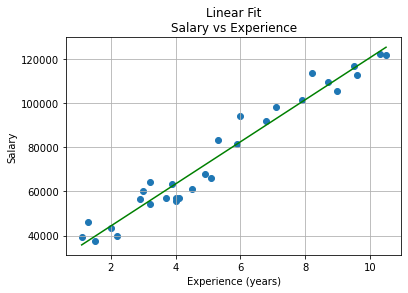

In [23]:
plt.plot(X,th1[-1]*X+th0[-1],'g-')
plt.scatter(X, y)
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.title('Linear Fit\nSalary vs Experience')
plt.grid(True)